In [1]:
## imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
## Data Retrieval

# The tech stocks we'll use for this analysis
tech_list = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']

# Set up End and Start times for data grab
tech_list = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [META, AAPL, AMZN, NFLX, GOOG]
company_name = ["META", "APPLE", "AMAZON", "NETLFIX", "GOOGLE"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  \
Date                                                                    
2022-12-30 00:00:00-05:00  87.364998  88.830002  87.029999  88.730003   
2023-01-03 00:00:00-05:00  89.830002  91.550003  89.019997  89.699997   
2023-01-04 00:00:00-05:00  91.010002  91.239998  87.800003  88.709999   
2023-01-05 00:00:00-05:00  88.070000  88.209999  86.559998  86.769997   
2023-01-06 00:00:00-05:00  87.360001  88.470001  85.570000  88.160004   
2023-01-09 00:00:00-05:00  89.195000  90.830002  88.580002  88.800003   
2023-01-10 00:00:00-05:00  86.720001  89.474998  86.699997  89.239998   
2023-01-11 00:00:00-05:00  90.059998  92.449997  89.739998  92.260002   
2023-01-12 00:00:00-05:00  92.400002  92.620003  90.570000  91.910004   
2023-01-13 00:00:00-05:00  91.528000  92.980003  90.930000  92.800003   

                           Adj Close    Volume company_name  
Date                                                         
2022-12-30 00:00:00-05:00  88.730003  19179300       GOOGLE  
2023-01-03 00:00:00-05:00  89.699997  20738500       GOOGLE  
2023-01-04 00:00:00-05:00  88.709999  27046500       GOOGLE  
2023-01-05 00:00:00-05:00  86.769997  23136100       GOOGLE  
2023-01-06 00:00:00-05:00  88.160004  26604400       GOOGLE  
2023-01-09 00:00:00-05:00  88.800003  22996700       GOOGLE  
2023-01-10 00:00:00-05:00  89.239998  22855600       GOOGLE  
2023-01-11 00:00:00-05:00  92.260002  25998800       GOOGLE  
2023-01-12 00:00:00-05:00  91.910004  22754200       GOOGLE  
2023-01-13 00:00:00-05:00  92.800003  18617800       GOOGLE

In [3]:
# Summary Stats
AAPL.describe()


Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   153.093520  155.192600  150.980640  153.133400  152.718812   
std     13.196849   13.095941   13.232812   13.216253   13.015442   
min    126.010002  127.769997  124.169998  125.019997  125.019997   
25%    142.717499  145.650005  140.734993  142.937500  142.694405   
50%    152.239998  154.355003  149.959999  151.909996  151.553131   
75%    164.297501  166.447498  162.262501  164.765003  163.975685   
max    178.550003  179.610001  176.699997  178.960007  178.154037   

             Volume  
count  2.500000e+02  
mean   8.745596e+07  
std    2.384921e+07  
min    3.519590e+07  
25%    7.120180e+07  
50%    8.287755e+07  
75%    9.604228e+07  
max    1.826020e+08

In [4]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-01-18 00:00:00-05:00 to 2023-01-13 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


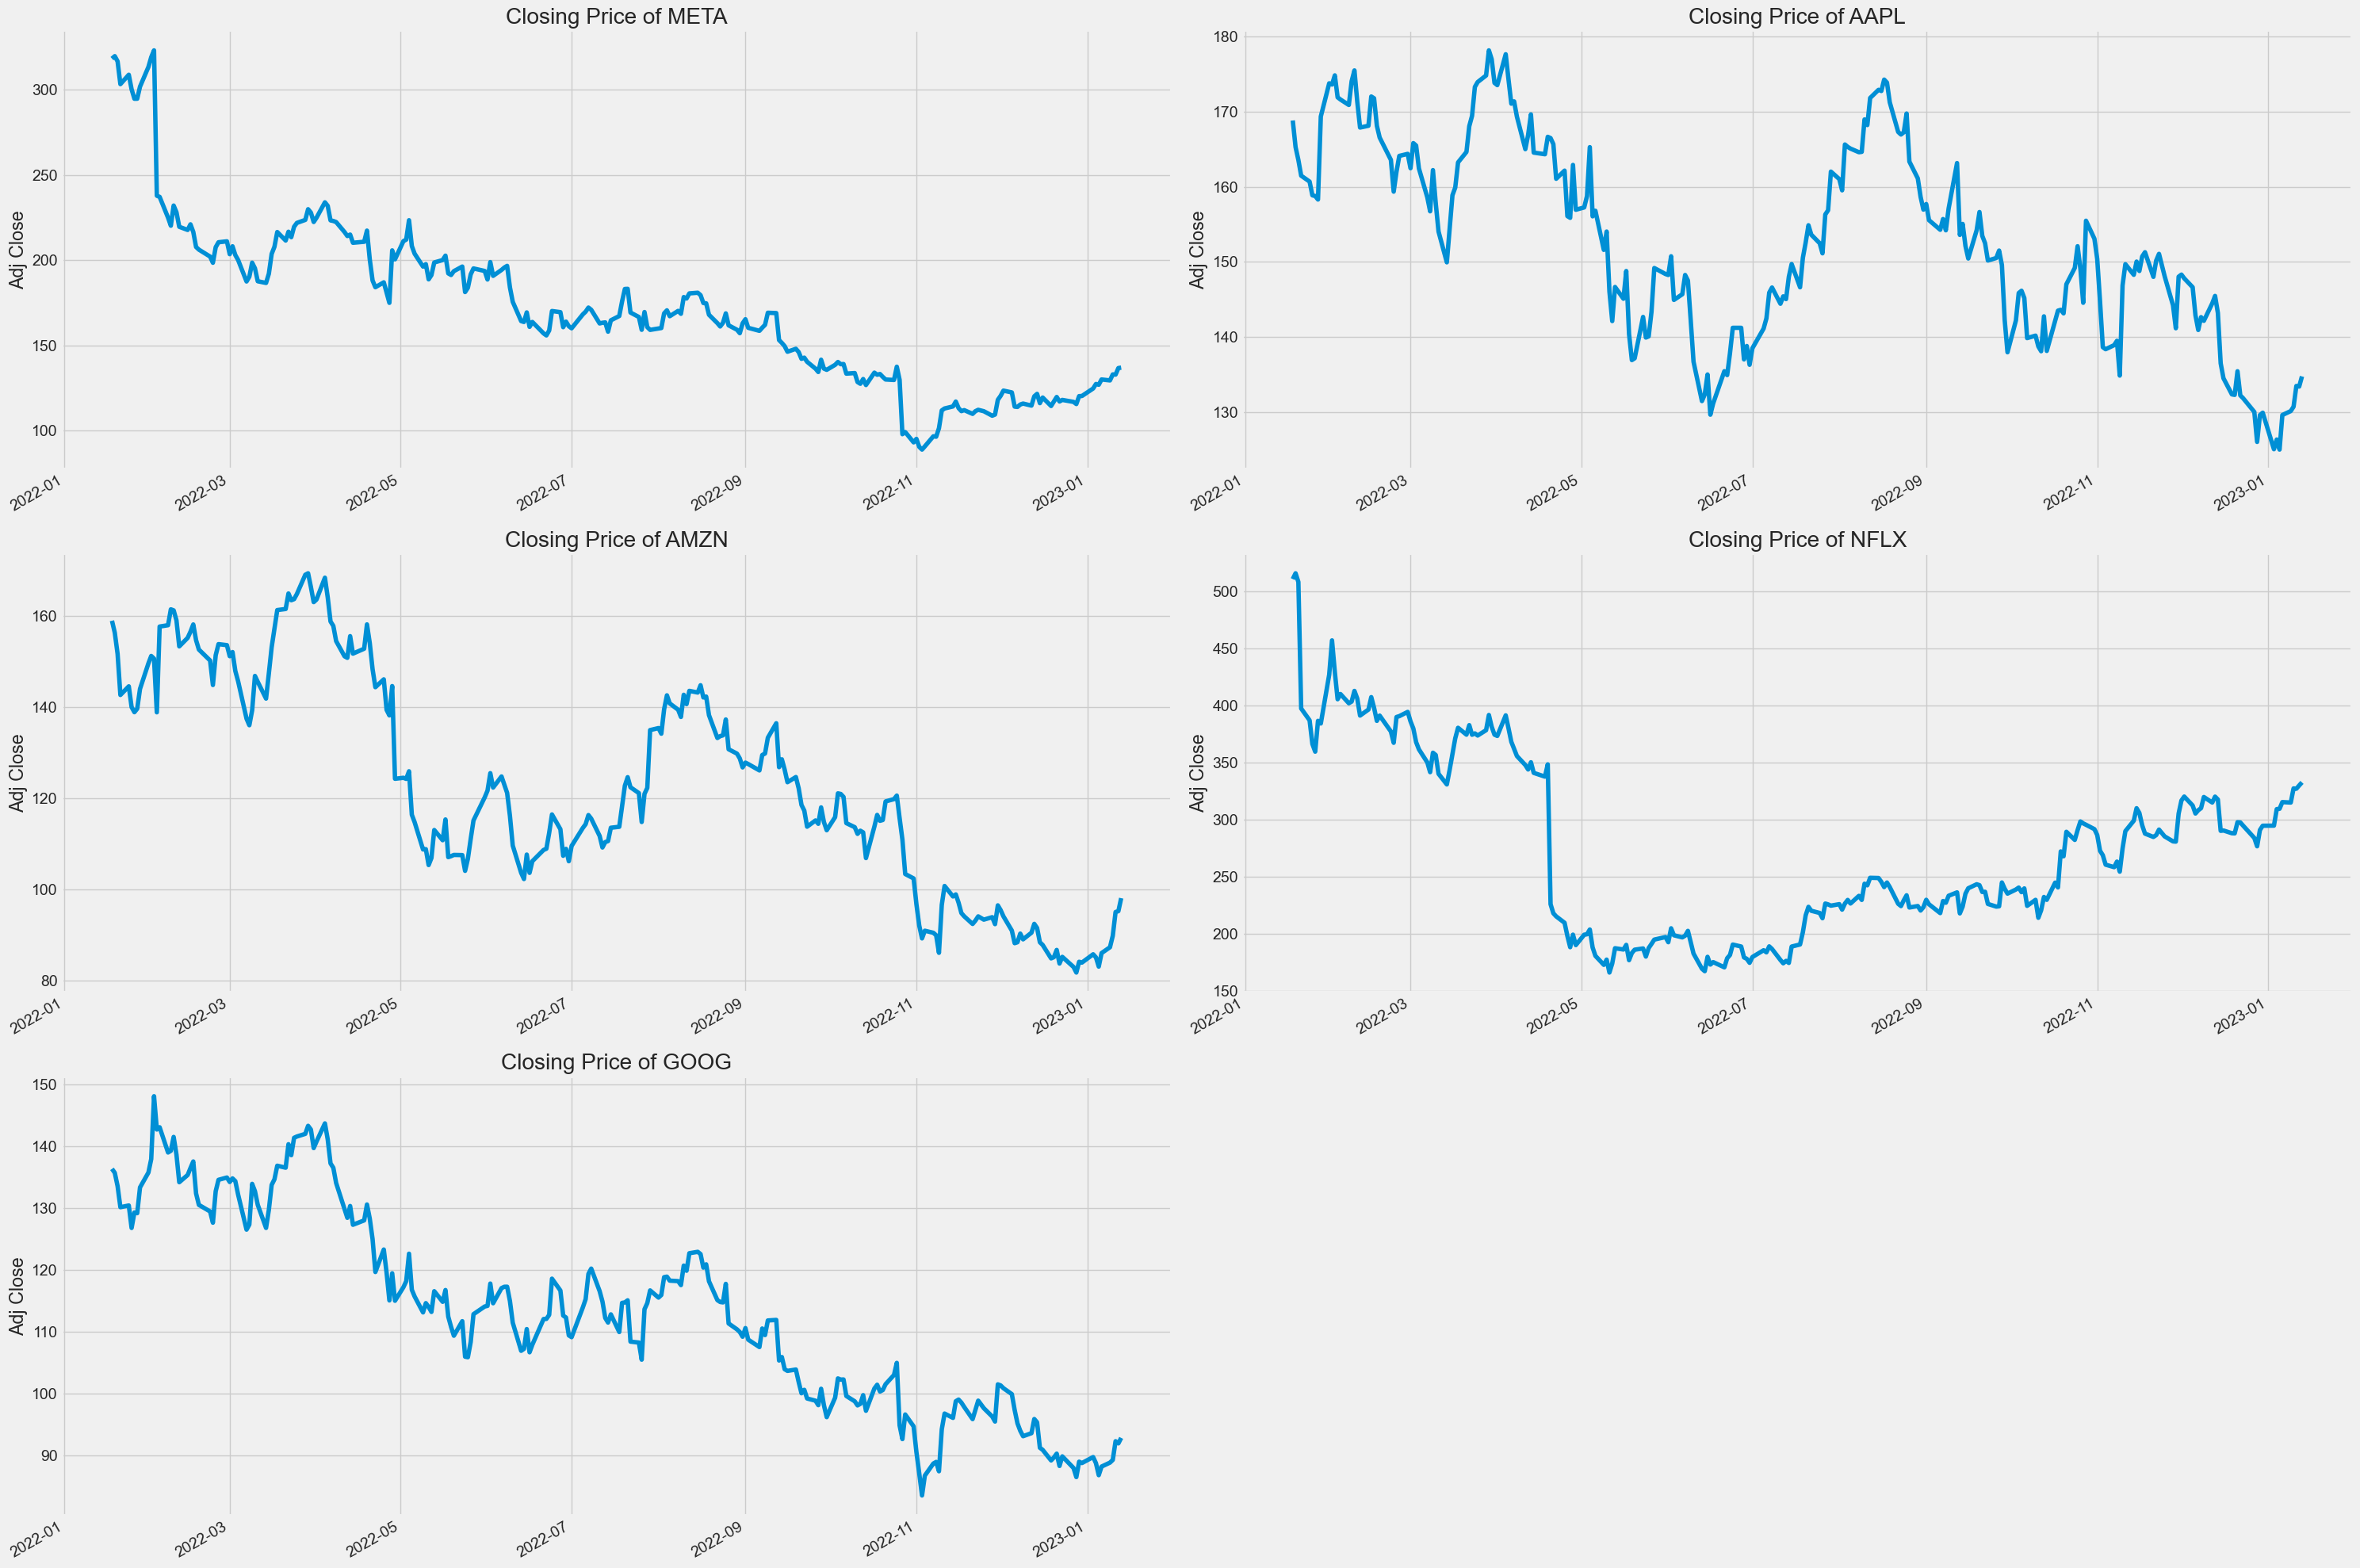

In [5]:
# Let's see a historical view of the closing price
plt.figure(figsize=(30, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

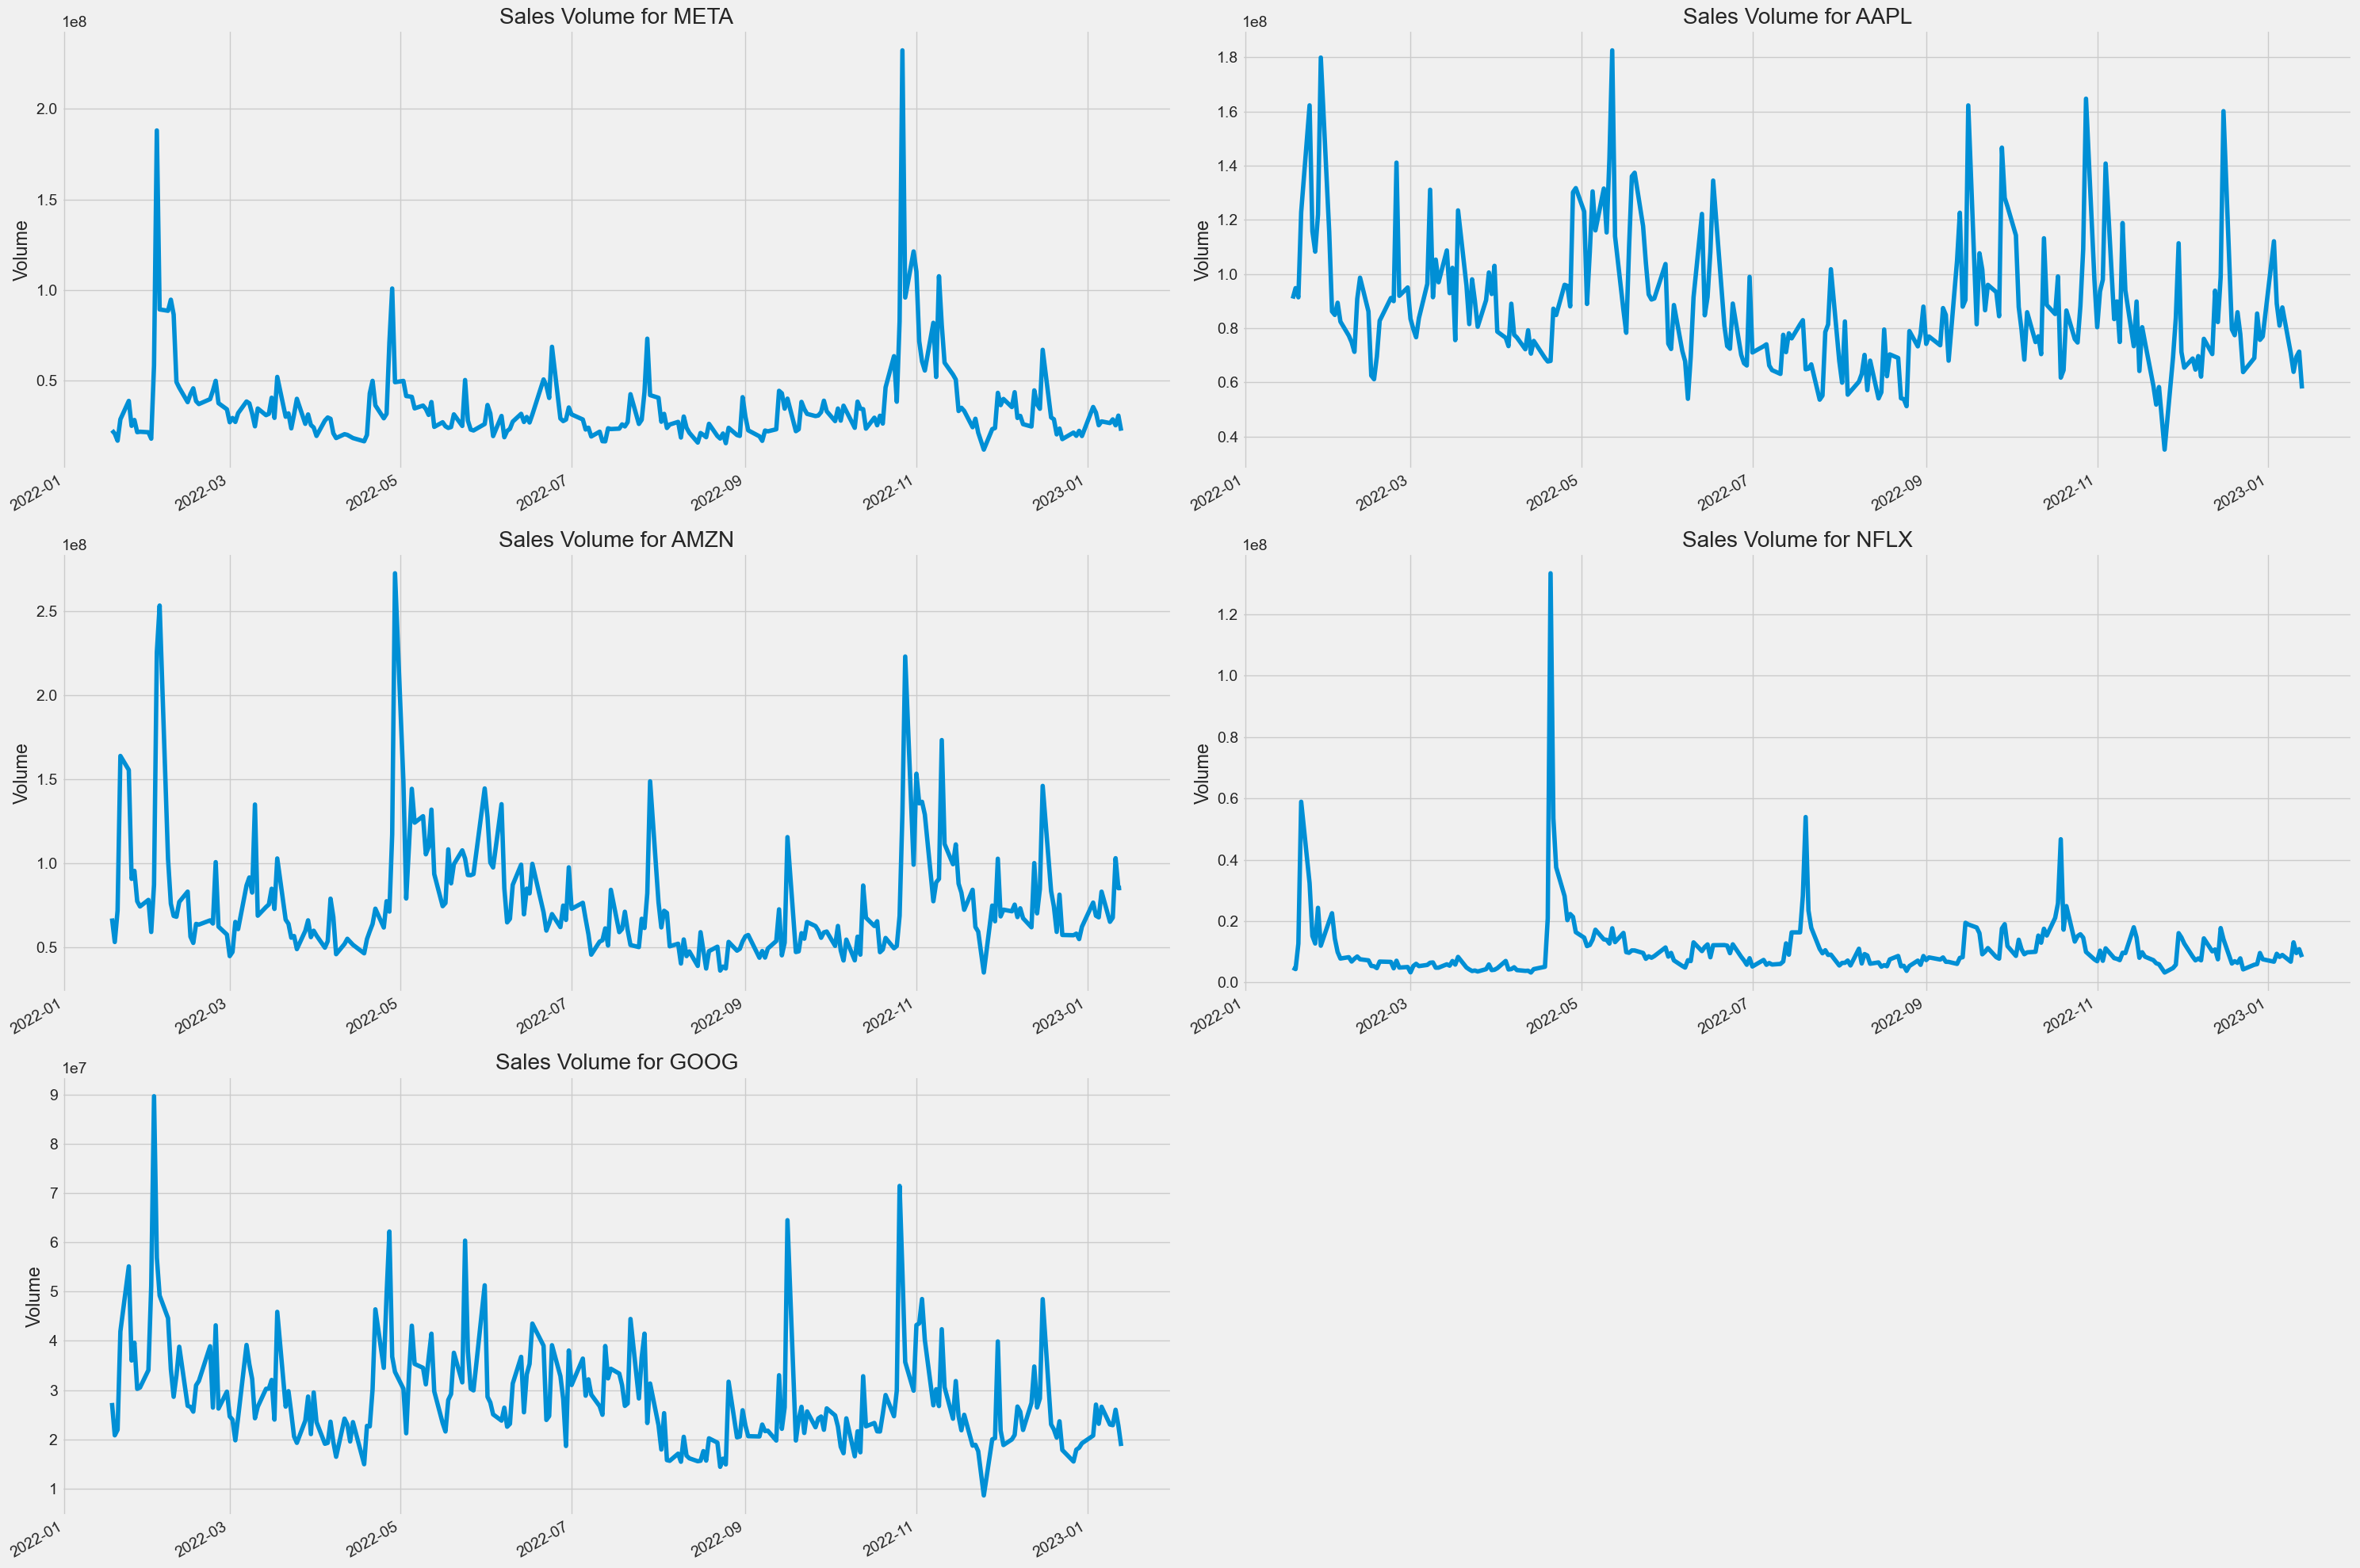

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(30, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

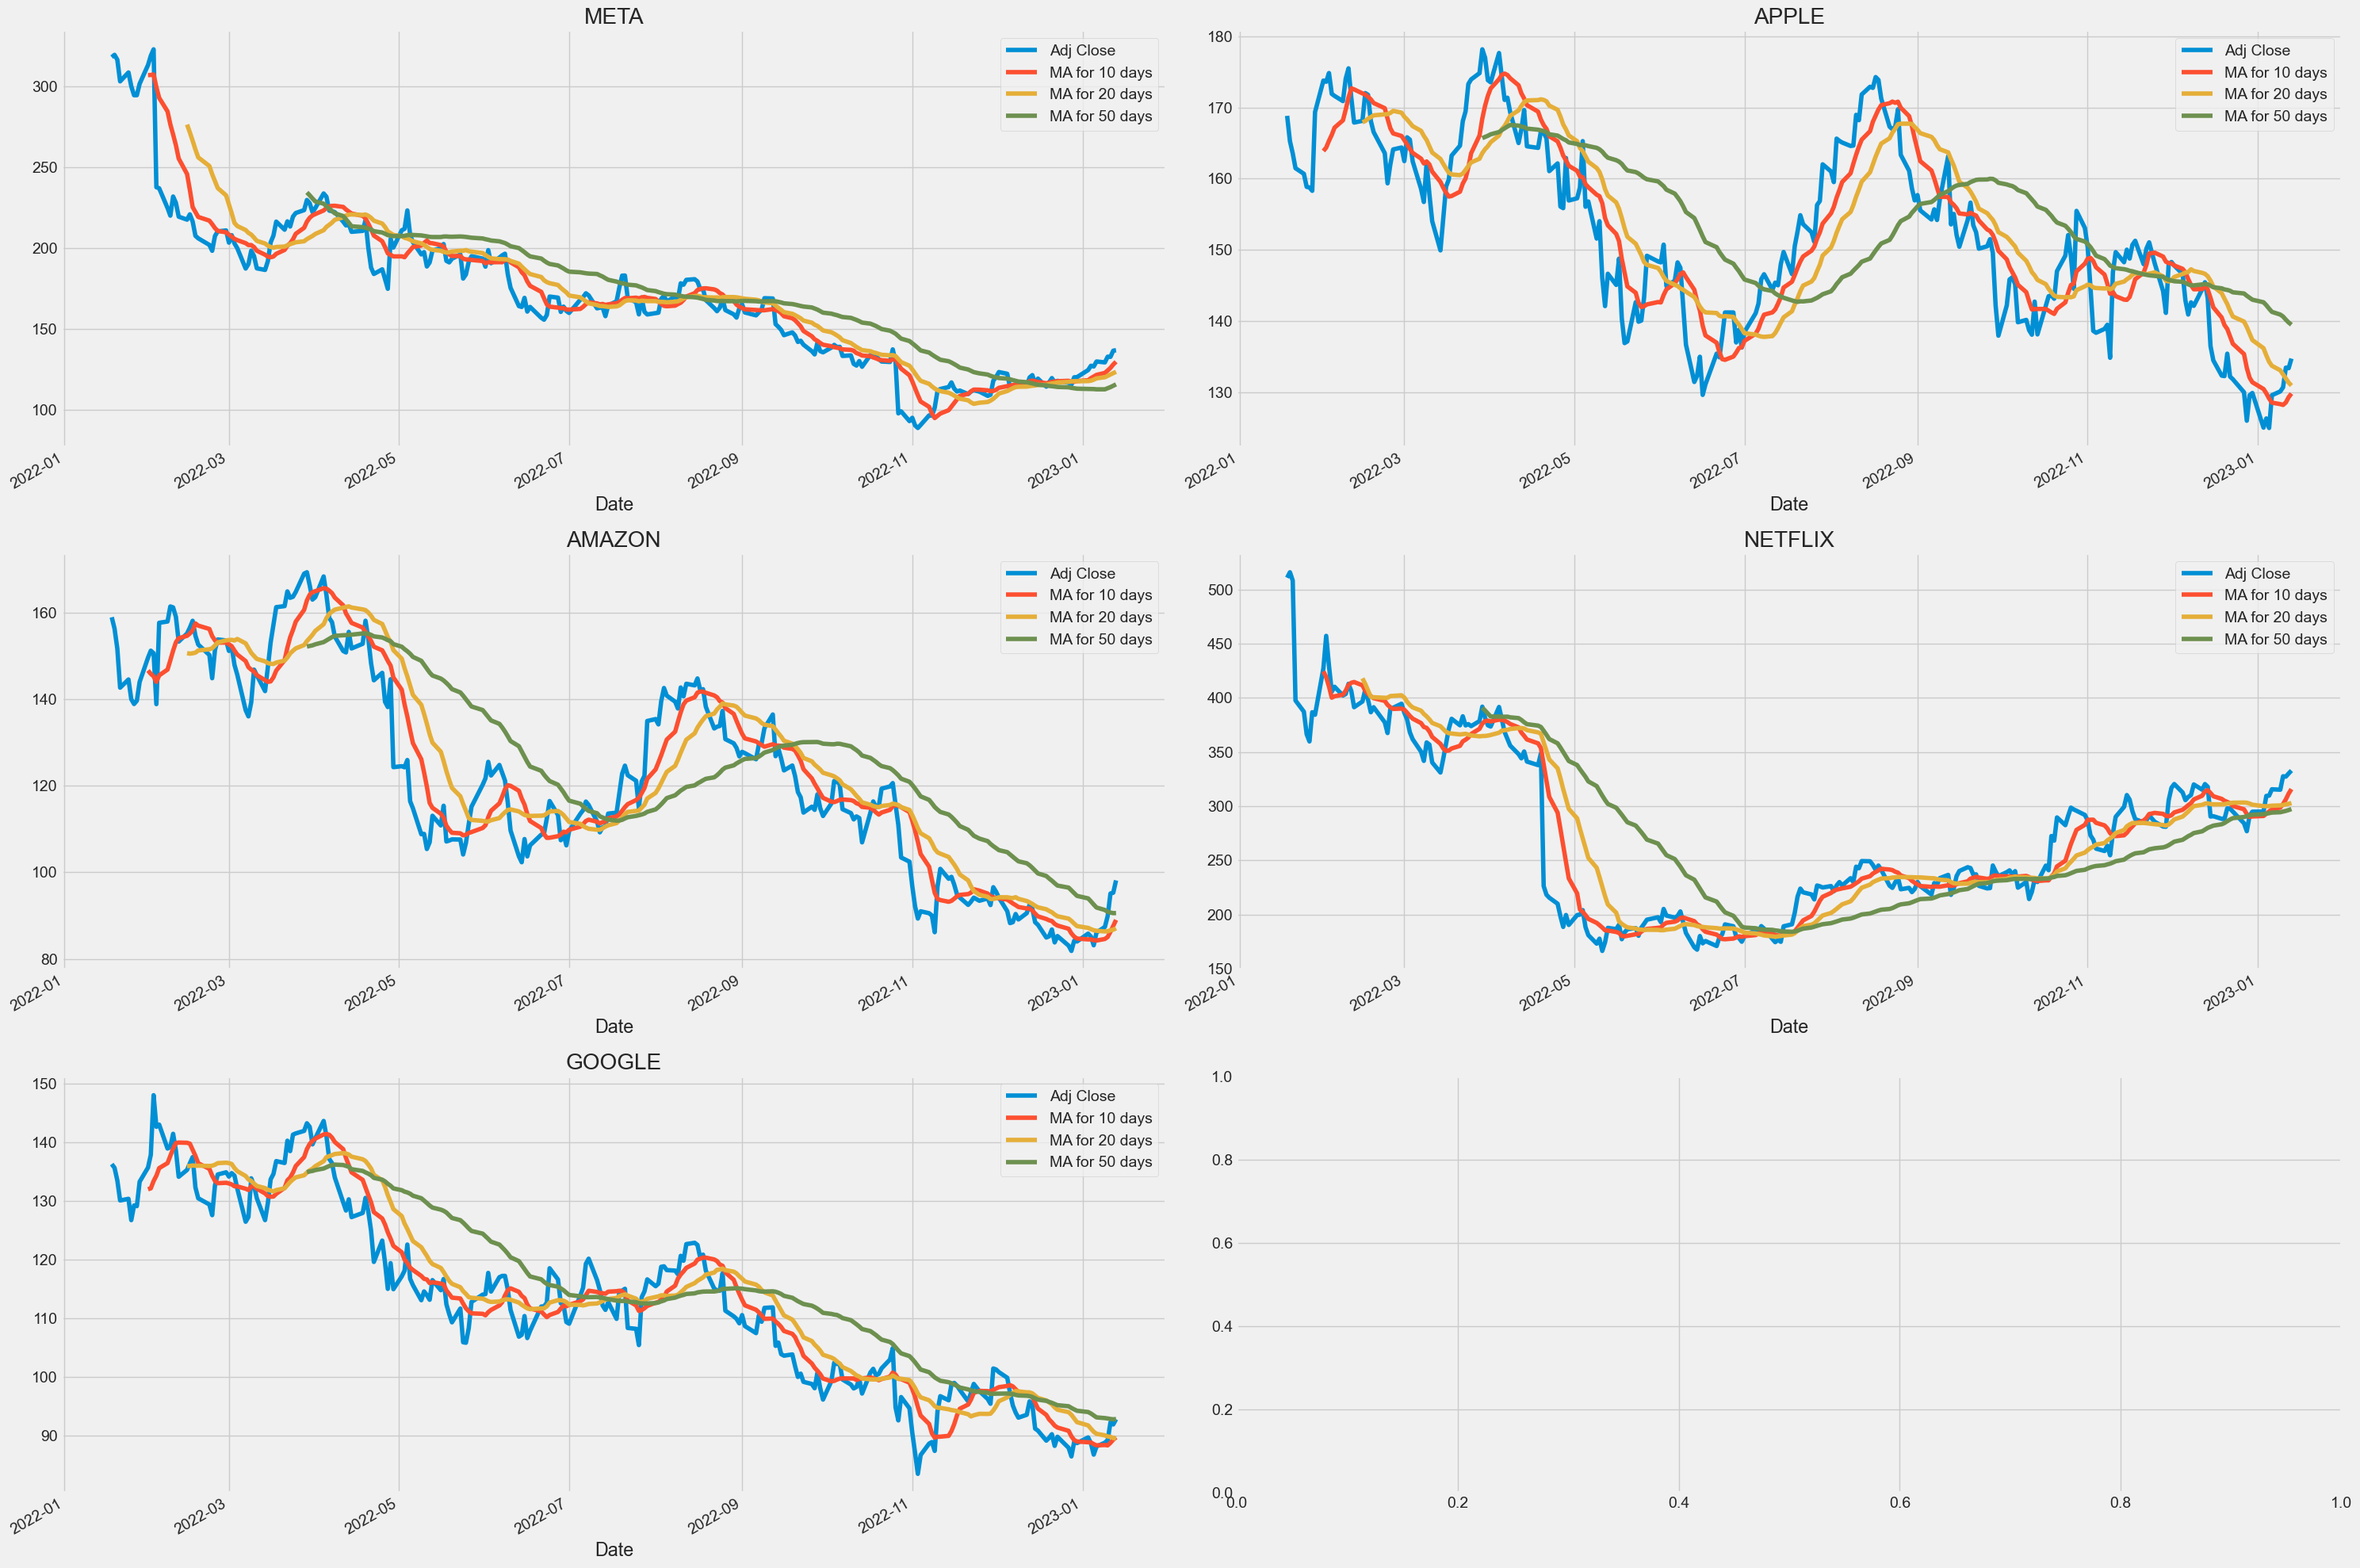

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(30)

META[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('META')

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('APPLE')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('AMAZON')

NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('NETFLIX')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('GOOGLE')


fig.tight_layout()

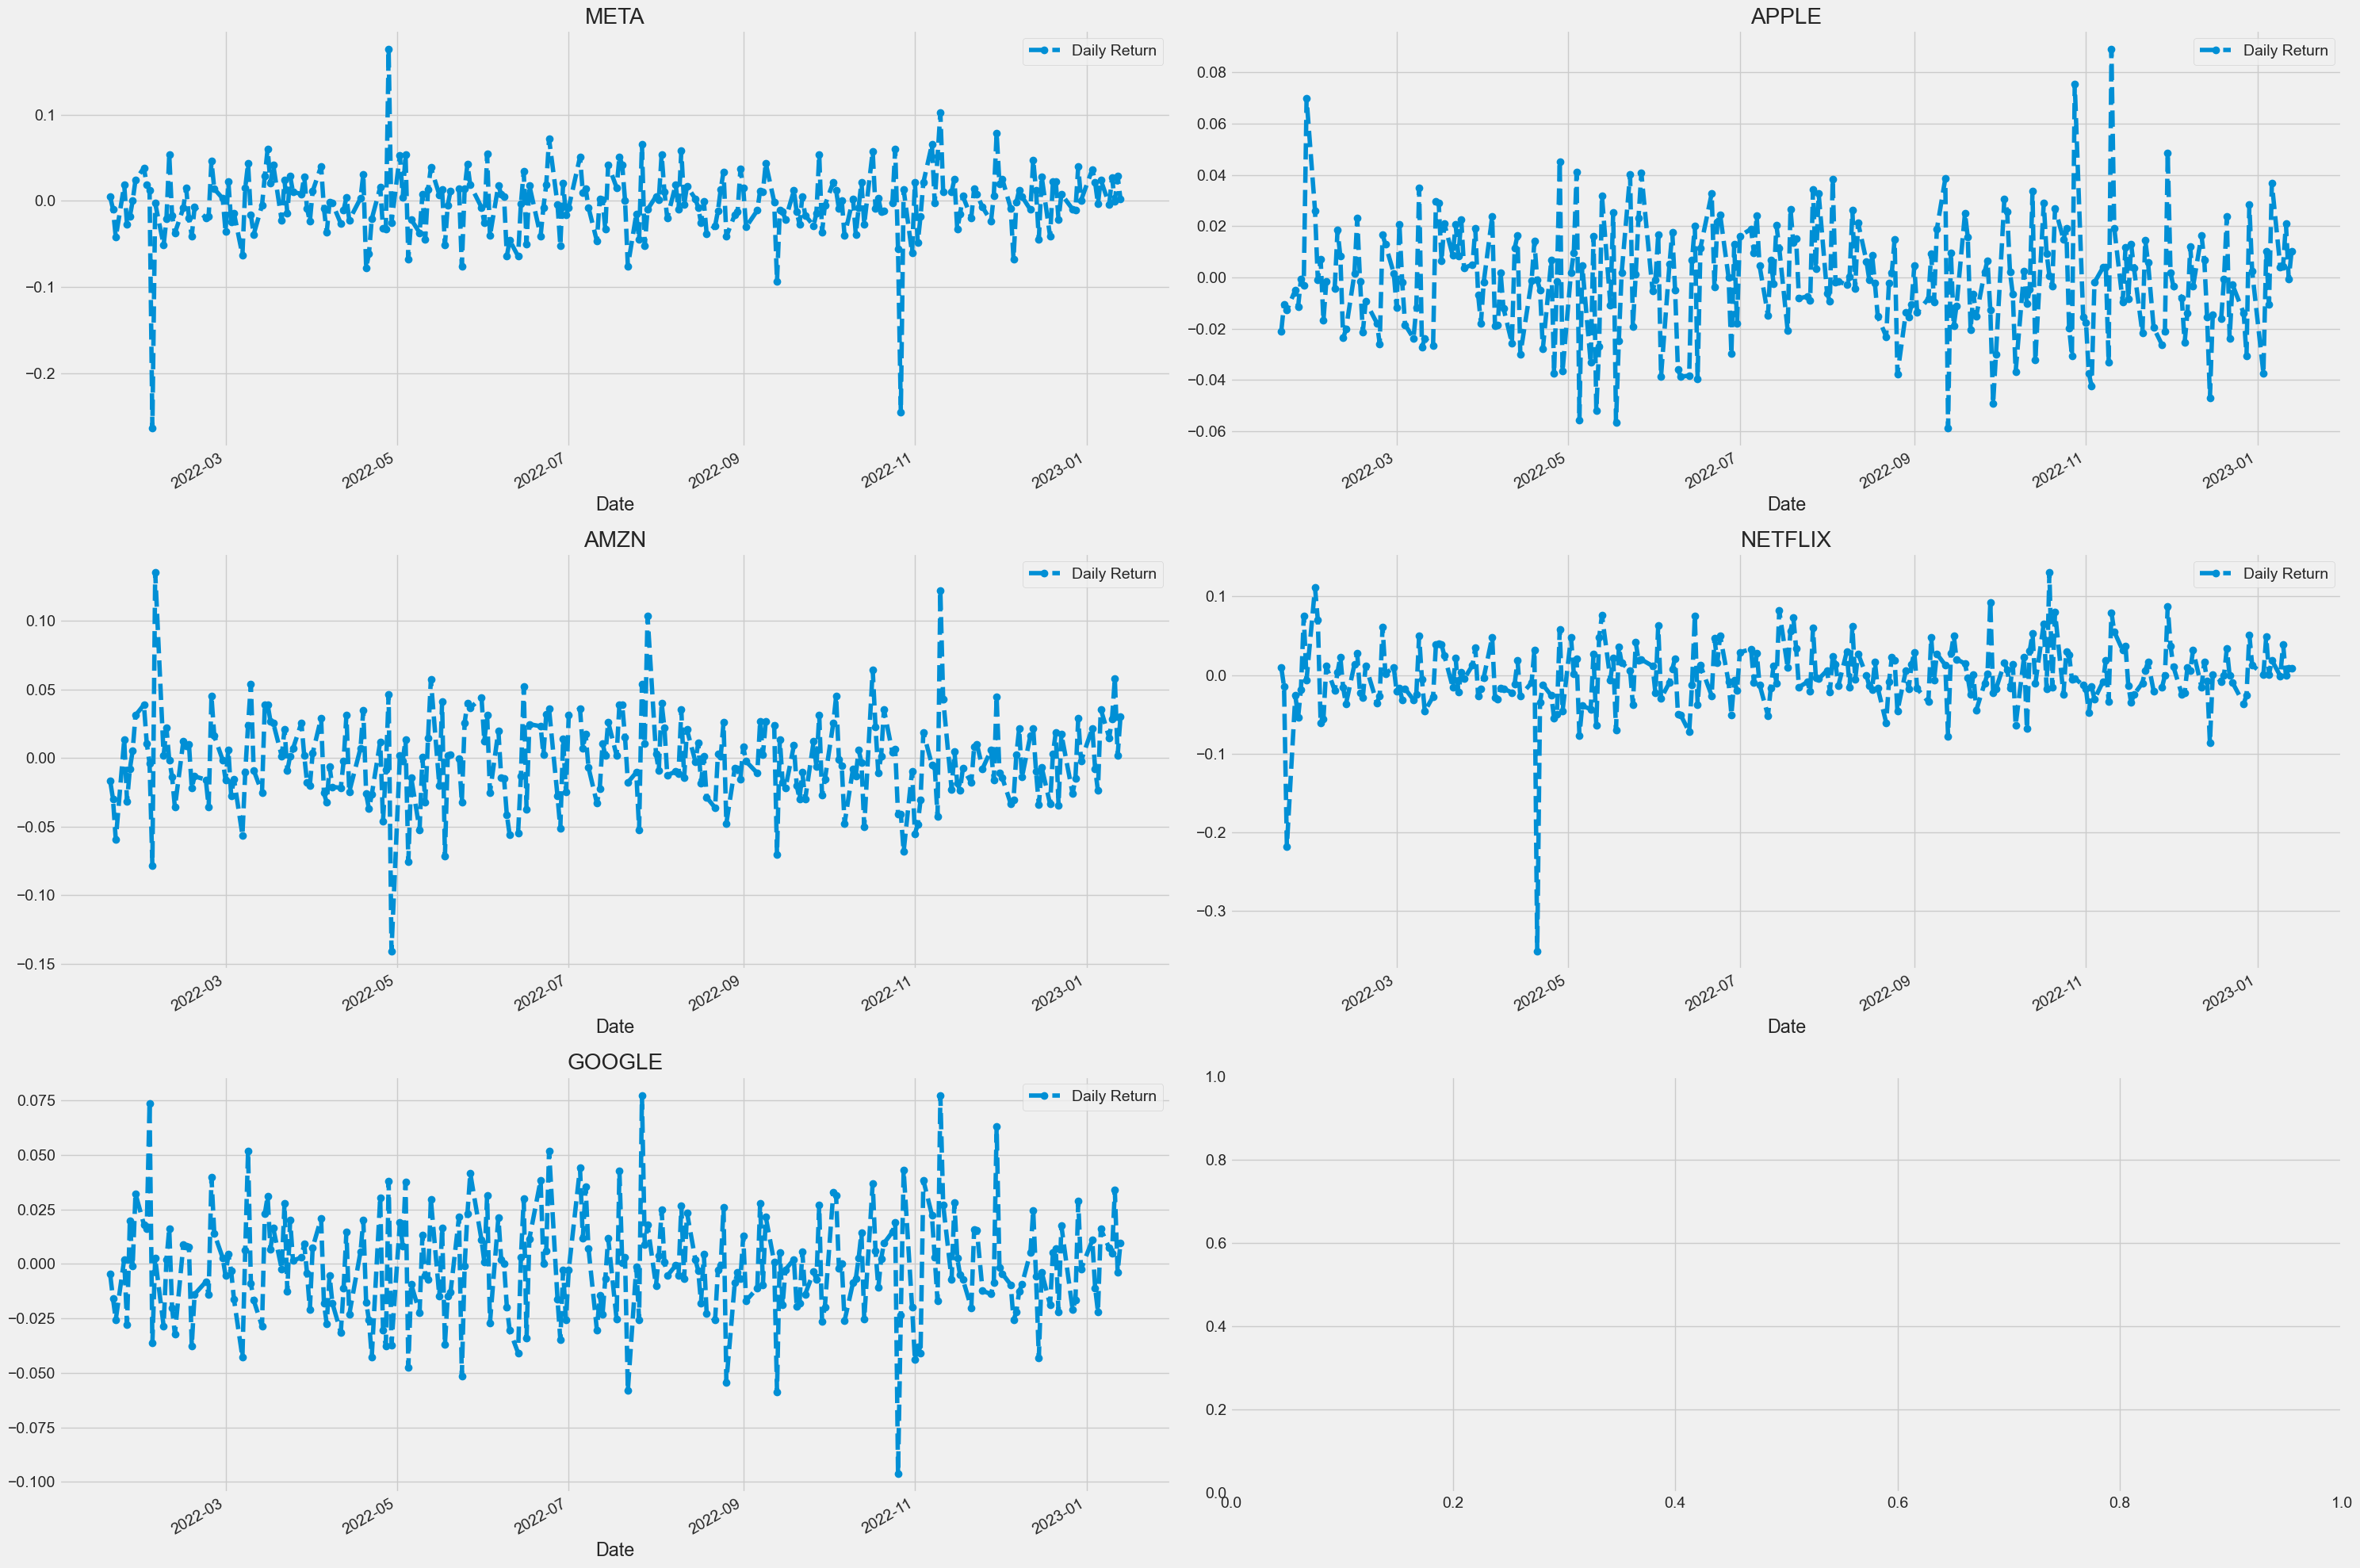

In [8]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(30)

META['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('META')

AAPL['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('APPLE')

AMZN['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('AMZN')

NFLX['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('NETFLIX')

GOOG['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('GOOGLE')

fig.tight_layout()

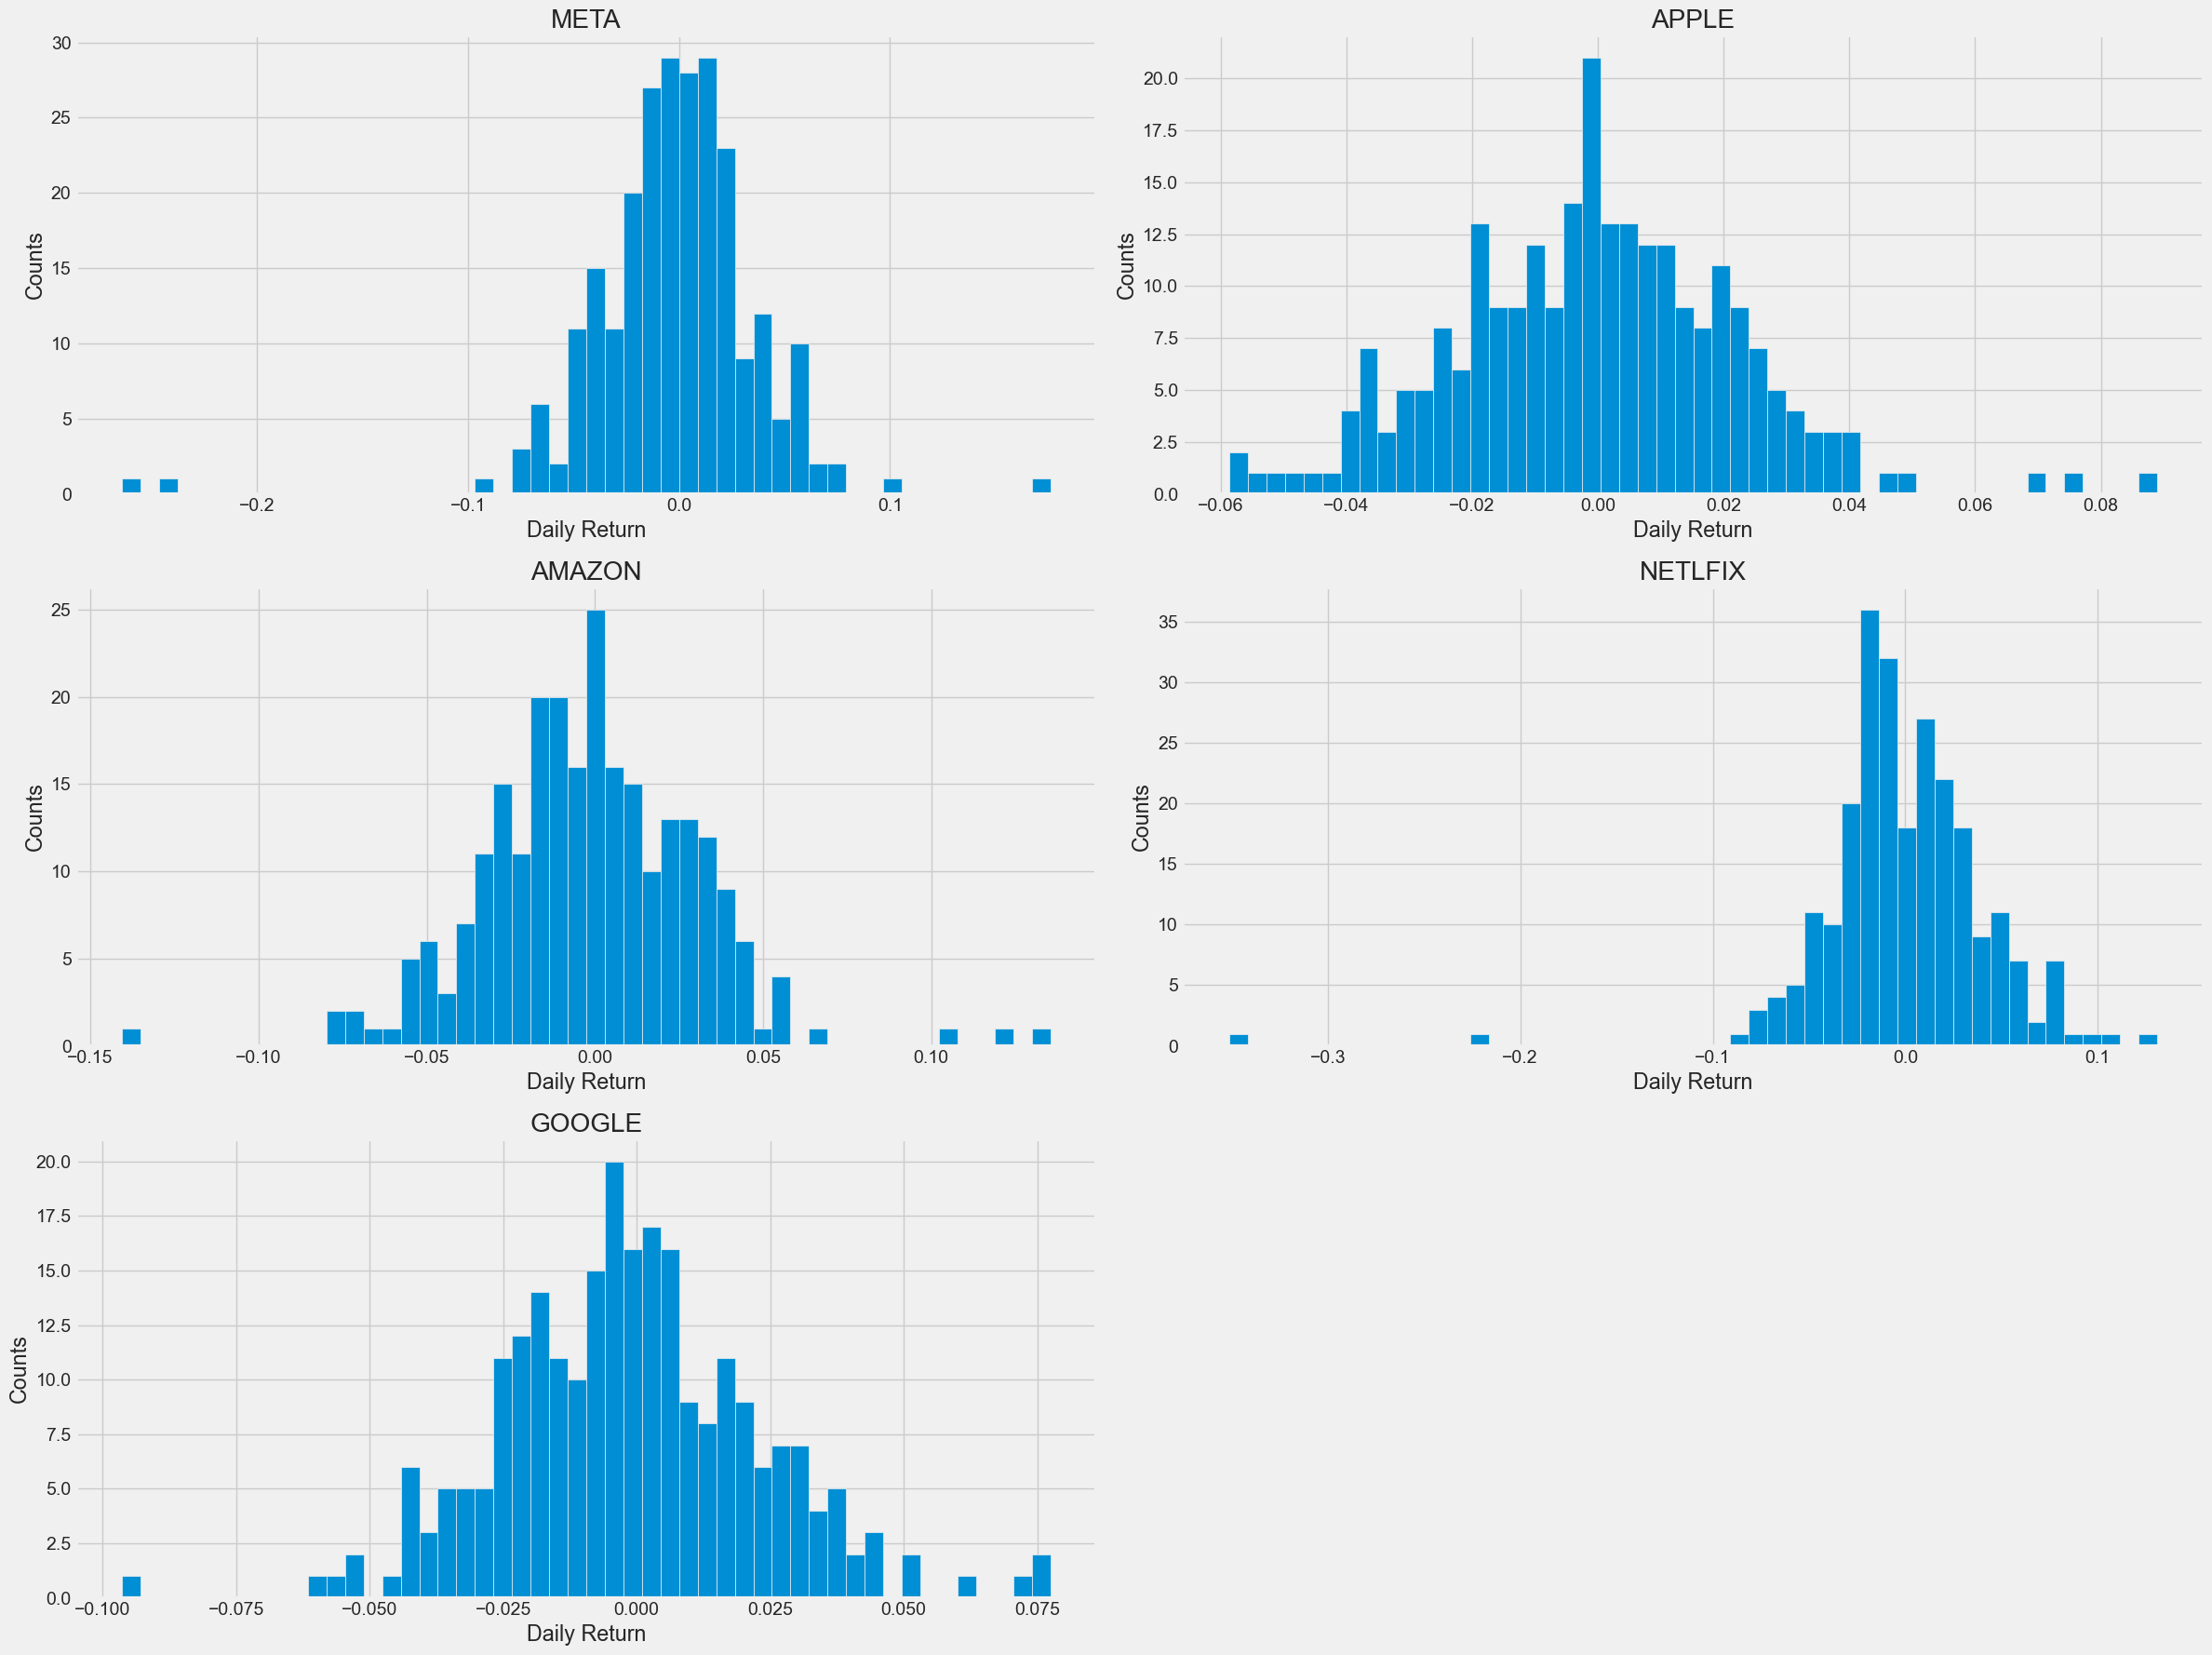

In [9]:
plt.figure(figsize=(24, 18))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [10]:
# Correlations
# Grab all the closing prices for the tech stock list into one DataFrame
from pandas_datareader import data as pdr
yf.pdr_override()
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

# closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  5 of 5 completed


AAPL      AMZN      GOOG      META      NFLX
Date                                                                       
2022-01-18 00:00:00-05:00       NaN       NaN       NaN       NaN       NaN
2022-01-19 00:00:00-05:00 -0.021025 -0.016477 -0.004685  0.004526  0.009906
2022-01-20 00:00:00-05:00 -0.010347 -0.029632 -0.015816 -0.009481 -0.014752
2022-01-21 00:00:00-05:00 -0.012765 -0.059502 -0.025576 -0.042298 -0.217905
2022-01-24 00:00:00-05:00 -0.004864  0.013327  0.002152  0.018274 -0.026038

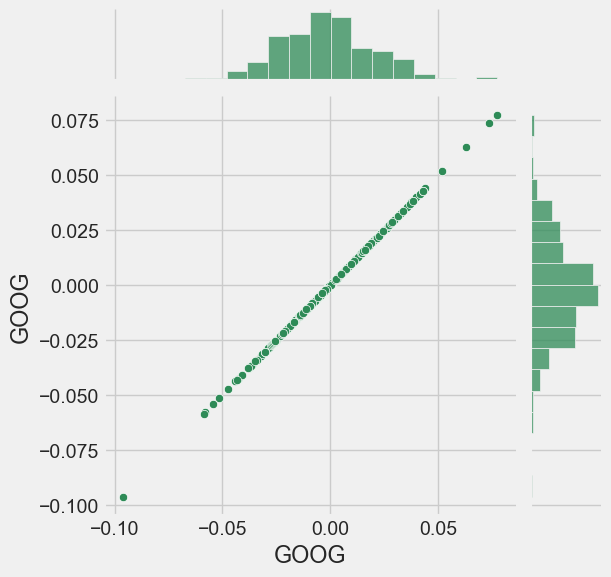

In [11]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

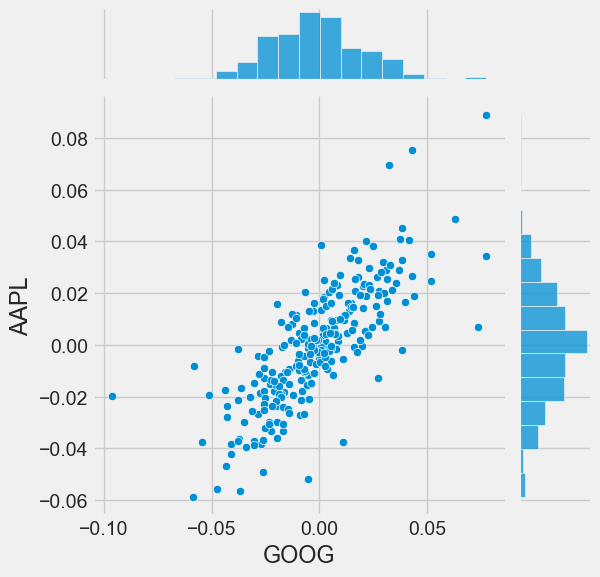

In [12]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='AAPL', data=tech_rets, kind='scatter')

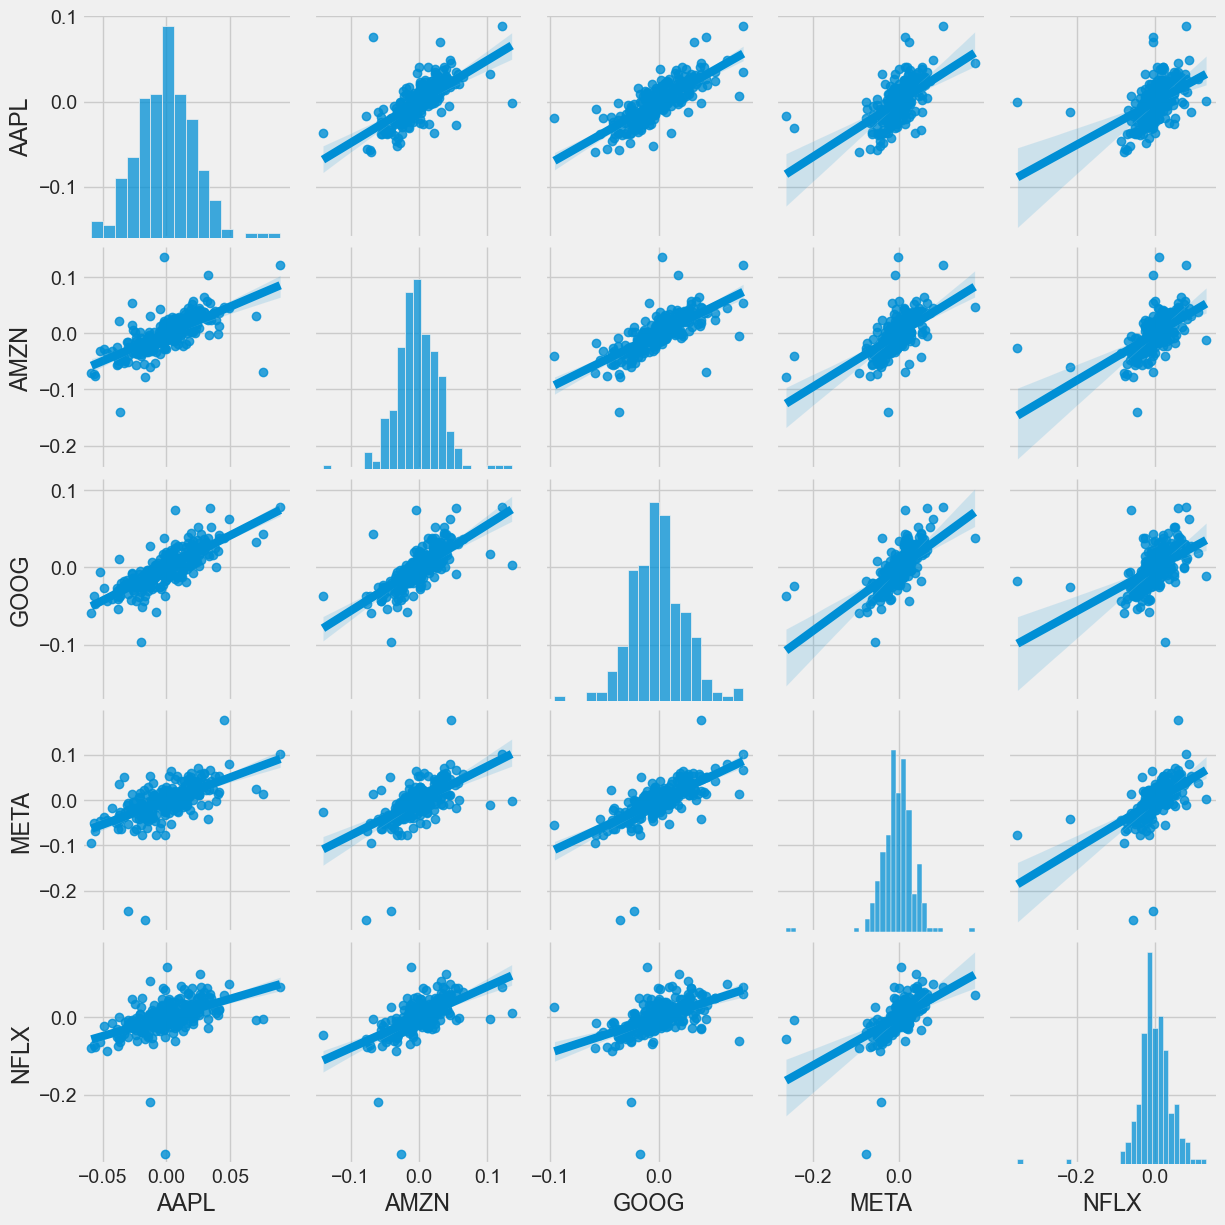

In [13]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

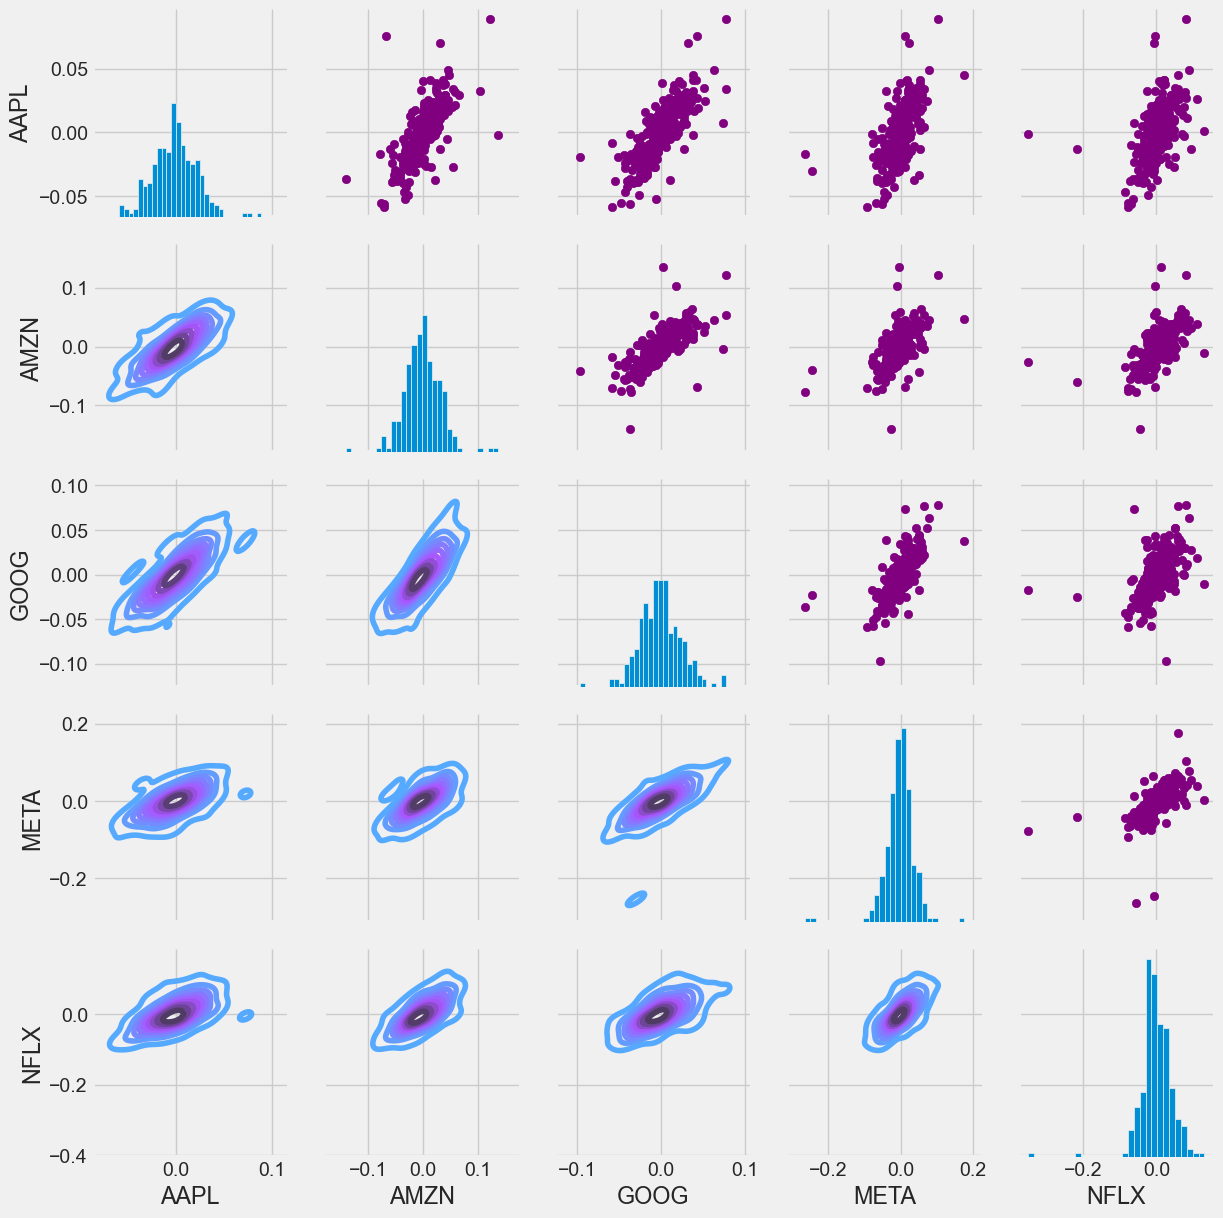

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

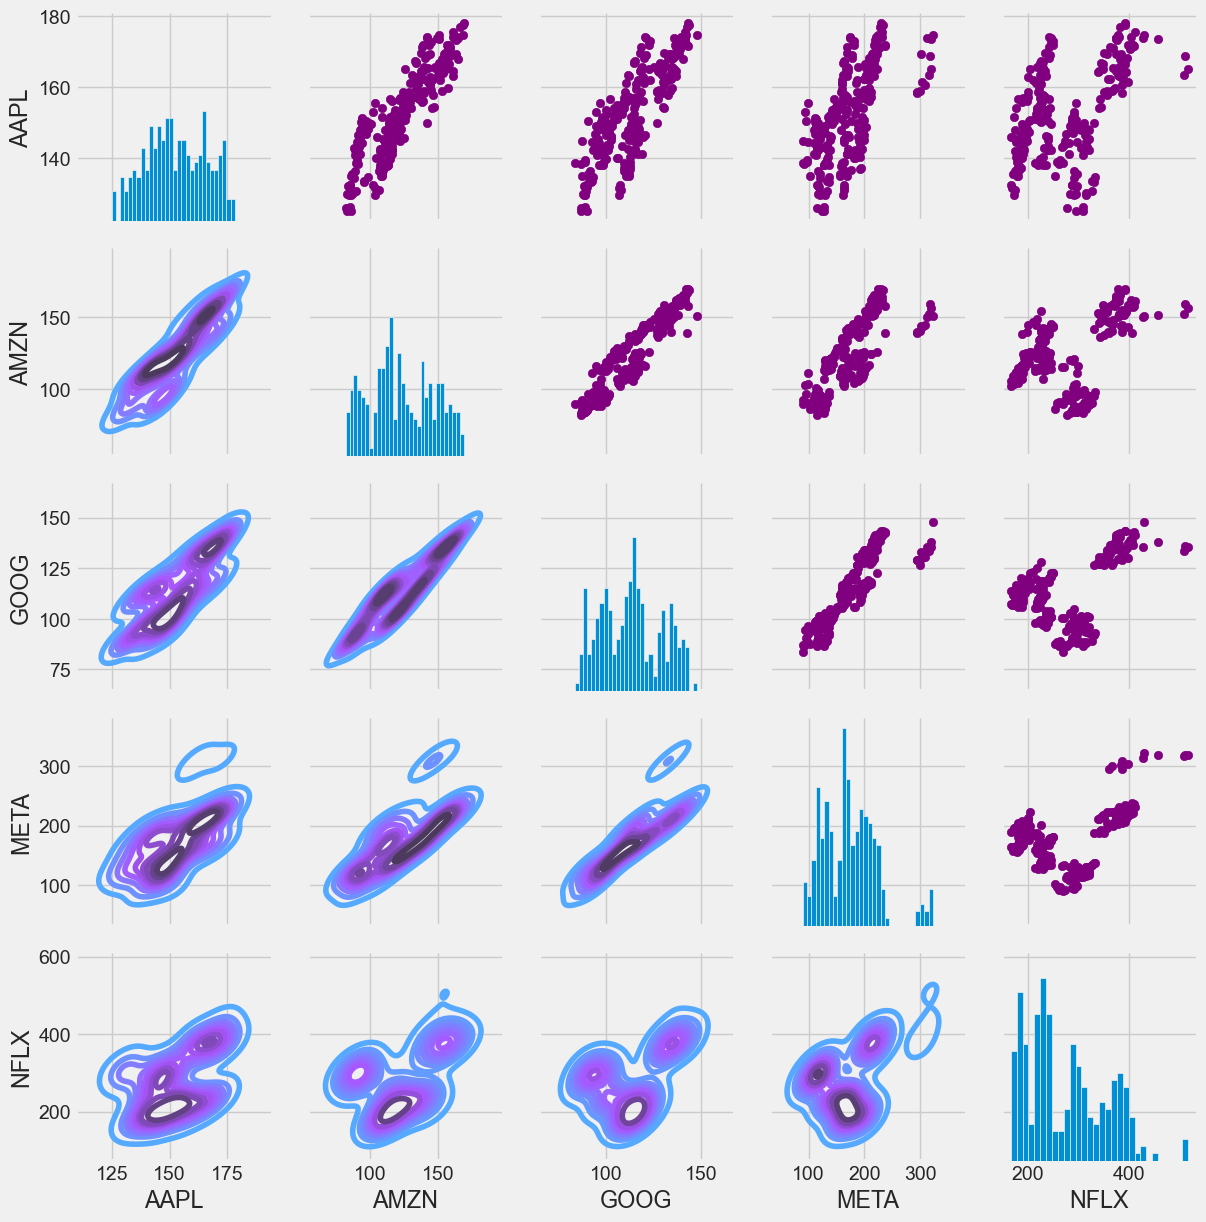

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

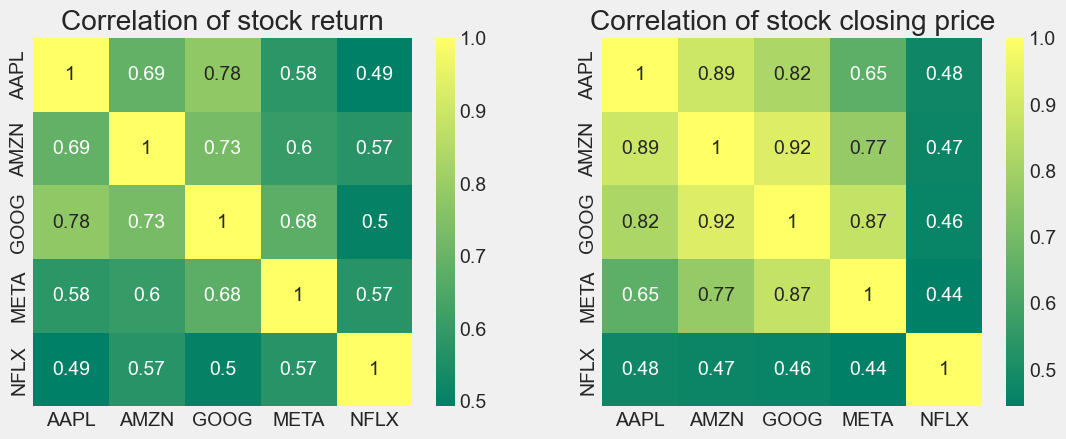

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

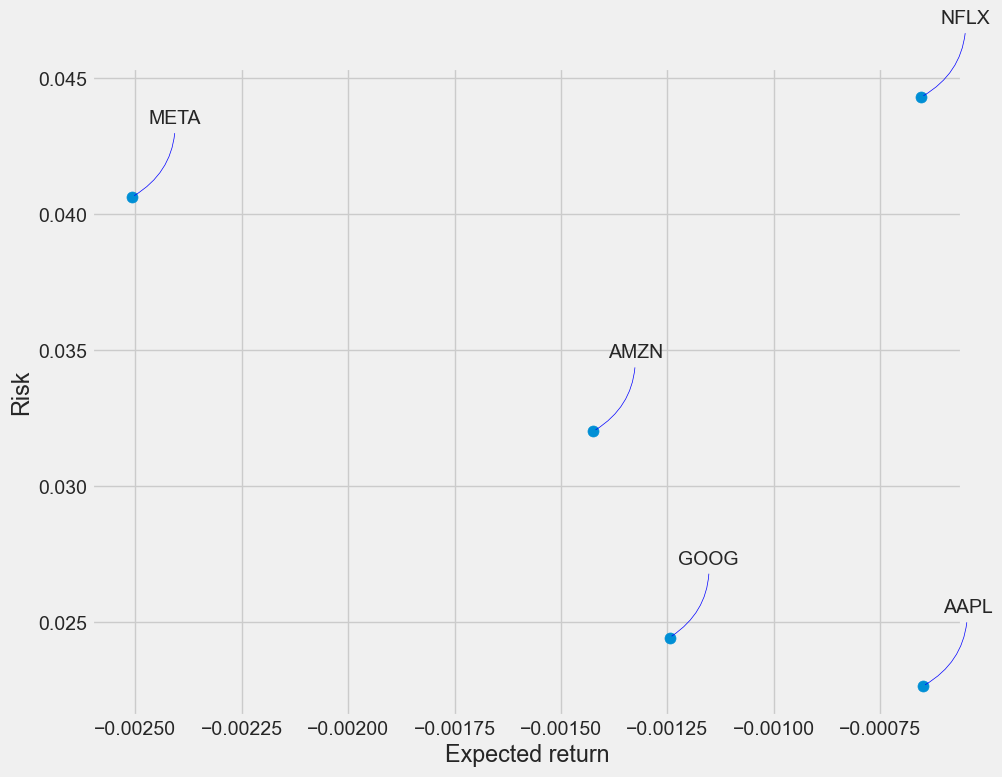

In [17]:
# Risk Assessment
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [18]:
# Predicting Closing Prices for AAPL
# Get the stock quote
df = pdr.get_data_yahoo('AAPL',start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close  \
Date                                                                        
2012-01-03 00:00:00-05:00   14.621429   14.732143   14.607143   14.686786   
2012-01-04 00:00:00-05:00   14.642857   14.810000   14.617143   14.765714   
2012-01-05 00:00:00-05:00   14.819643   14.948214   14.738214   14.929643   
2012-01-06 00:00:00-05:00   14.991786   15.098214   14.972143   15.085714   
2012-01-09 00:00:00-05:00   15.196429   15.276786   15.048214   15.061786   
...                               ...         ...         ...         ...   
2023-01-09 00:00:00-05:00  130.470001  133.410004  129.889999  130.149994   
2023-01-10 00:00:00-05:00  130.259995  131.259995  128.119995  130.729996   
2023-01-11 00:00:00-05:00  131.250000  133.509995  130.460007  133.490005   
2023-01-12 00:00:00-05:00  133.880005  134.259995  131.440002  133.410004   
2023-01-13 00:00:00-05:00  132.029999  134.919998  131.660004  134.759995   

                            Adj Close     Volume  
Date                                              
2012-01-03 00:00:00-05:00   12.519279  302220800  
2012-01-04 00:00:00-05:00   12.586556  260022000  
2012-01-05 00:00:00-05:00   12.726296  271269600  
2012-01-06 00:00:00-05:00   12.859332  318292800  
2012-01-09 00:00:00-05:00   12.838937  394024400  
...                               ...        ...  
2023-01-09 00:00:00-05:00  130.149994   70790800  
2023-01-10 00:00:00-05:00  130.729996   63896200  
2023-01-11 00:00:00-05:00  133.490005   69458900  
2023-01-12 00:00:00-05:00  133.410004   71379600  
2023-01-13 00:00:00-05:00  134.759995   57758000  

[2777 rows x 6 columns]

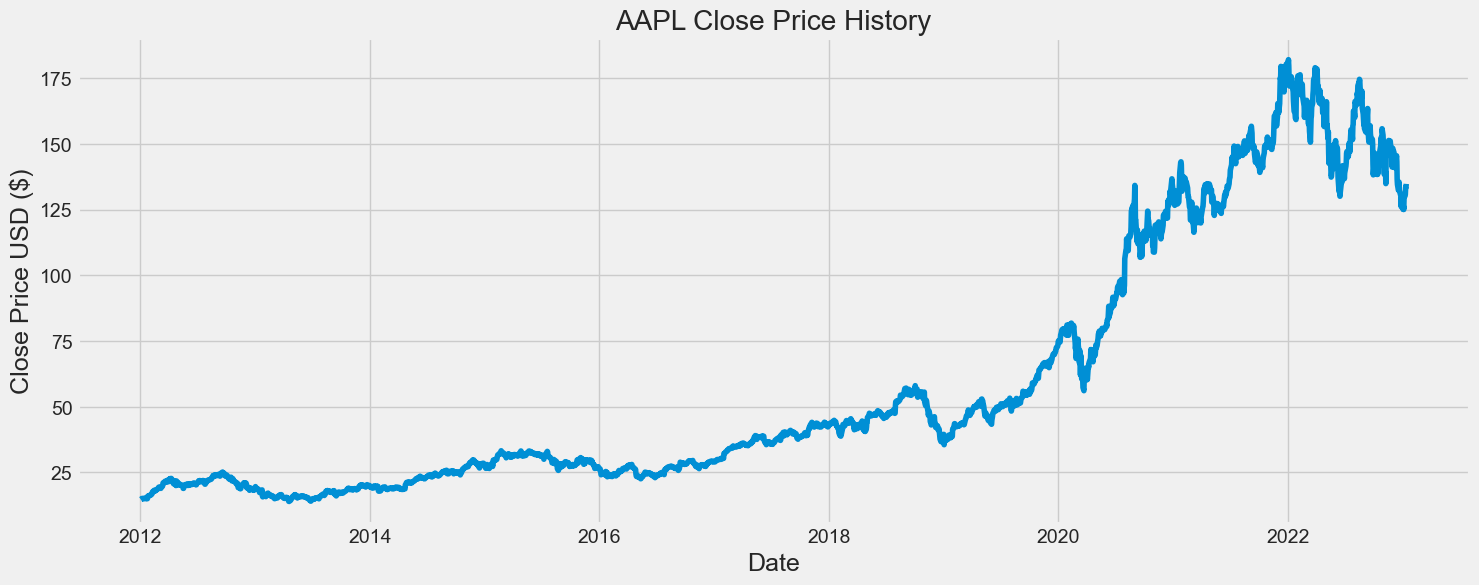

In [19]:
plt.figure(figsize=(16,6))
plt.title('AAPL Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2639

In [21]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.71129794],
       [0.71082191],
       [0.71885458]])

In [22]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [23]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
hist = model.fit(x_train, y_train, batch_size=1, epochs=1)

2023-01-15 17:06:24.120671: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-15 17:06:27.383373: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2579/2579 [==============================] - 42s 16ms/step - loss: 0.0013 - accuracy: 7.7549e-04


In [25]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 17ms/step


6.4663997713687635

/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_82555/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


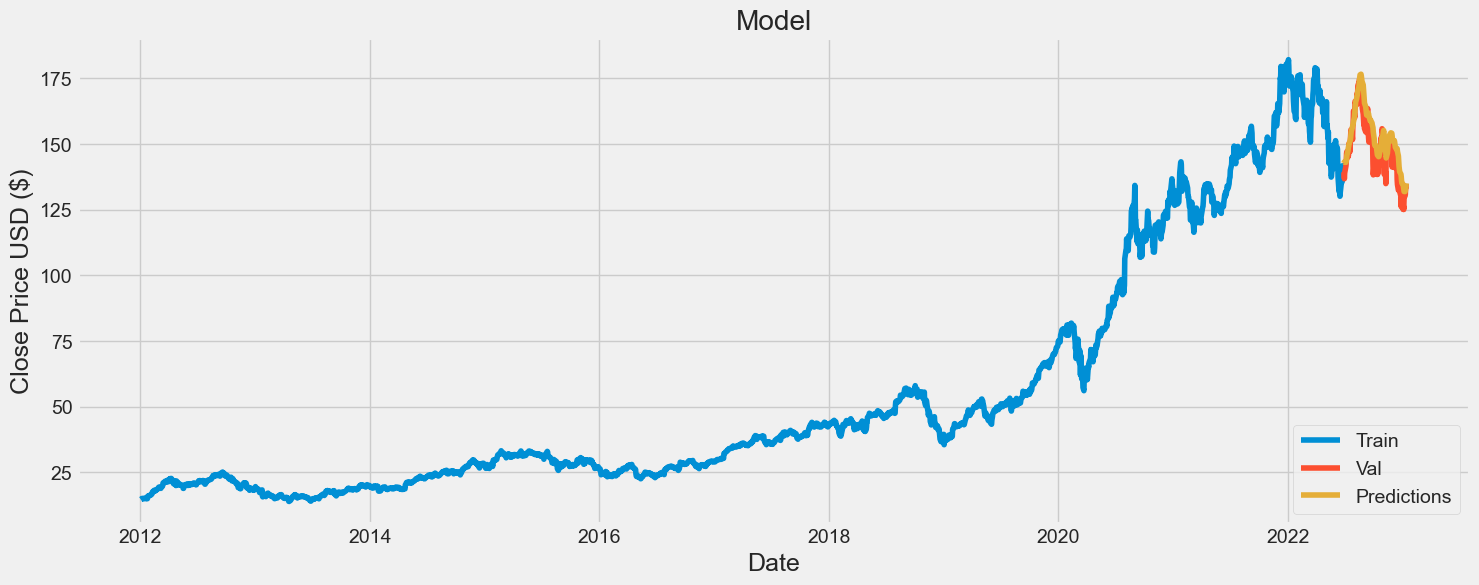

In [26]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [27]:
# Show the valid and predicted prices
valid
# hist.history.get('accuracy')[-1]

Close  Predictions
Date                                              
2022-06-29 00:00:00-04:00  139.229996   142.691940
2022-06-30 00:00:00-04:00  136.720001   143.116104
2022-07-01 00:00:00-04:00  138.929993   142.975052
2022-07-05 00:00:00-04:00  141.559998   142.972229
2022-07-06 00:00:00-04:00  142.919998   143.429337
...                               ...          ...
2023-01-09 00:00:00-05:00  130.149994   131.841415
2023-01-10 00:00:00-05:00  130.729996   132.257431
2023-01-11 00:00:00-05:00  133.490005   132.889923
2023-01-12 00:00:00-05:00  133.410004   133.950470
2023-01-13 00:00:00-05:00  134.759995   135.002335

[138 rows x 2 columns]

In [29]:
# References: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook#6.-Predicting-the-closing-price-stock-price-of-APPLE-inc: